In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('US_Elections_2020.csv')
display(df)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN
...,...,...,...
2547,"b'RT @BoycottUtah: It is Friday, October 30, 2...",1,NaN
2548,b'@nowthisnews Delivered today in Montgomery C...,1,NaN
2549,b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...,0,covid19
2550,b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...,0,covid19


In [2]:
df['negative_reason'].unique()

array(['covid19', 'others', nan, 'discrimination', 'corruption', 'crime'],
      dtype=object)

In [3]:
sdf=pd.read_csv('sentiment_analysis.csv')
display(sdf)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [4]:
df.groupby(by=['negative_reason']).size()

negative_reason
corruption        220
covid19           405
crime             222
discrimination    215
others            202
dtype: int64

In [5]:
print('Number of Nan values:',int(len(df['negative_reason'])-220-222-405-215-202))

Number of Nan values: 1288


In [6]:
df['negative_reason'].fillna('NA',inplace=True)
df.groupby(by=['negative_reason']).size()

negative_reason
NA                1288
corruption         220
covid19            405
crime              222
discrimination     215
others             202
dtype: int64

In [7]:
#Convert HTML to ASCII
import html
def html2ascii(data):
        t=html.unescape(data)
        t=t.encode('ascii','ignore').decode()
        return t

In [8]:
df['text']=df['text'].apply(html2ascii)
display(df)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NA
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NA
...,...,...,...
2547,"b'RT @BoycottUtah: It is Friday, October 30, 2...",1,NA
2548,b'@nowthisnews Delivered today in Montgomery C...,1,NA
2549,b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...,0,covid19
2550,b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...,0,covid19


In [9]:
#Extract Hashtags for Exploratory Analysis
def extract_hashtags(text):
    l=[]
    for w in text.split():
        if w[0]=='#':
            l.append(w[1:])
    return l

In [10]:
sdf['text']=sdf['text'].apply(html2ascii)
display(sdf)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [11]:
#Remove tags from text
import re
tags=re.compile(r'(?i)(<[^>]+>)')
df['text']=df['text'].str.replace(tags,'')
display(df)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NA
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NA
...,...,...,...
2547,"b'RT @BoycottUtah: It is Friday, October 30, 2...",1,NA
2548,b'@nowthisnews Delivered today in Montgomery C...,1,NA
2549,b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...,0,covid19
2550,b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...,0,covid19


In [12]:
sdf['text']=sdf['text'].str.replace(tags,'')
display(sdf)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [13]:
df['text']=df['text'].str.lower()
sdf['text']=sdf['text'].str.lower()

In [14]:
text=','.join(df.text.values)
hashtags=extract_hashtags(text)
hashtags=list(set(hashtags))
display(hashtags)

['',
 'maintreammedia',
 'followme',
 'veto',
 'covid-19?',
 'electionfraud',
 'news,b\'"nothing',
 'fakemelania',
 'democats',
 "trumpcrimefamily',b'@phillypolice",
 'bidenharris2020.',
 'subscribe',
 'joebiden,s',
 'blackvoicesfortrump',
 'athlete',
 'votersuppression',
 'unitedstates',
 'racism',
 'maga2020landslide',
 'hunterbidenslaptop',
 "trumpcrimefamily,b'who",
 'trump2020tosavetheworld',
 "bidencorruption',b'as",
 'theintercept',
 'hunterbidenpedo',
 'bidenharris2020\',b"@realdonaldtrump',
 'fun',
 'resistersunite',
 "trumpcrimefamily',b'@realdonaldtrump",
 'chanukah',
 'newsnight',
 'saveamerica',
 'georgiaearlyvoting',
 'glenngreenwald',
 'christmasgifts?',
 "vote',b'@realdonaldtrump",
 'maga\',b"@brettfavre',
 'umisushiatl',
 "voteinpersonvip',b'icymi",
 'ivotedearly',
 'childhoodcancer',
 'votebidenhesanadult?',
 'kent',
 'pscilocybin",b\'rt',
 'terrorismo',
 'bidenharris2020",b"live',
 'milkcartonalert?',
 "nfl,b'rt",
 'poetry',
 'bidenharris2020\',b"#covid19',
 'samsung

In [15]:
tdf=df[['text','sentiment']]

In [16]:
#Cleaning of text data to remove unnecessary characters
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def clean_text(data):
    text=re.sub(r'\W+',' ',data)
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")
    cleaned_text= [w for w in words if not w in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text 

In [17]:
df['text']=df['text'].apply(clean_text)
display(df)

,text,sentiment,negative_reason
0,b robreiner so afraid of nov dec and jan even ...,0,covid19
1,b rt lord sumption launches recovery a new ini...,0,others
2,b rt walidphares uber timing after biden advis...,0,covid19
3,b every seconds an american is dying from the ...,1,NA
4,b rt thewebbix the democrats embrace diversity...,1,NA
...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA
2548,b nowthisnews delivered today in montgomery co...,1,NA
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19
2550,b rt any ideas why joebiden is wasting time in...,0,covid19


In [18]:
sdf['text']=sdf['text'].apply(clean_text)
display(sdf)

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,rt mianusmanjaved congratulations pakistan on ...,1
2,7.680980e+17,rt pepalerts this september yesmag is taking y...,1
3,7.680980e+17,rt newly painted walls thanks a million to our...,1
4,7.680980e+17,rt cedricfeschotte excited to announce as of j...,1
...,...,...,...
550386,8.046170e+17,i can t stop watching her mm more https t co w...,0
550387,8.046180e+17,poor old tom odell doesn t look like he would ...,0
550388,8.046180e+17,antsmasher i smashed ants in this awesome game...,1
550389,8.046180e+17,lizhudston kymwyllie evasmiless meanbok mornin...,1


# TF-IDF

In [19]:
#Feature engineering for TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
df_vectors=vect.fit_transform(df['text'].values)
vectors_list=df_vectors.todense().tolist()
features=vect.get_feature_names()
df_tfidf= pd.DataFrame(vectors_list, columns=features)
display(df_tfidf)

,aaoqyniuol,aapis,aaron,aaronharris,abandon,abandoned,abbott,abc,abcworldnews,abdulelsayed,...,zhqwnxfjcl,zhrrqywigd,zip,zlatan,znxggdezbx,zoetillman,zones,zoological,ztmrszluap,zunderwhelmed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df=df.rename(columns={'text':'text_data'})
df2=df.join(df_tfidf, on=df.index, how='left')
display(df2)

,text_data,sentiment,negative_reason,aaoqyniuol,aapis,aaron,aaronharris,abandon,abandoned,abbott,...,zhqwnxfjcl,zhrrqywigd,zip,zlatan,znxggdezbx,zoetillman,zones,zoological,ztmrszluap,zunderwhelmed
0,b robreiner so afraid of nov dec and jan even ...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b rt lord sumption launches recovery a new ini...,0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b rt walidphares uber timing after biden advis...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b every seconds an american is dying from the ...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b rt thewebbix the democrats embrace diversity...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,b nowthisnews delivered today in montgomery co...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,b rt any ideas why joebiden is wasting time in...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Splitting the general tweets dataset since it is too big to run on jupyter notebook and there is not enough memory
from sklearn.model_selection import train_test_split
sem_df,xem_df=train_test_split(sdf,test_size=0.99,stratify=sdf['label'],random_state=42)

In [22]:
vect2=TfidfVectorizer()
sdf_vectors=vect2.fit_transform(sem_df['text'].values)
vectors_list=sdf_vectors.todense().tolist()
features=vect2.get_feature_names()
sdf_tfidf= pd.DataFrame(vectors_list, columns=features)
display(sdf_tfidf)

,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,aapsense,aaron,aarpfl,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
sem_df=sem_df.rename(columns={'text':'text_data','label':'label_value'})
sem_df=sem_df.reset_index(drop=True)
df3=sem_df.join(sdf_tfidf, on=sem_df.index, how='left')
display(df3)

,ID,text_data,label_value,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,7.831250e+17,nationalboyfriendday thanks for bomb dick http...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.956420e+17,handmade with an italian influence our chocola...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.977930e+17,most iditarod dogs are forced to live at the e...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.001800e+17,last summer in germany was so great can i go b...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.685050e+17,rt gurmeetramrahim a stunning move well done p...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,8.032700e+17,seeing all the love i got a year ago thank you...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5499,8.025520e+17,check out ansley another team gb gold medalist...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5500,7.686060e+17,rt ofcparodyacc happy weeksary sa ating lahat ...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5501,7.685390e+17,rt harry styles is so cute kcacolombia kcaarge...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_vectors=vect2.transform(df['text_data'].values)
vectors_list=df_vectors.todense().tolist()
features=vect2.get_feature_names()
df_tfidf2= pd.DataFrame(vectors_list, columns=features)
display(df_tfidf2)

,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,aapsense,aaron,aarpfl,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df4=df.join(df_tfidf2, on=df.index, how='left')
display(df4)

,text_data,sentiment,negative_reason,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,b robreiner so afraid of nov dec and jan even ...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b rt lord sumption launches recovery a new ini...,0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b rt walidphares uber timing after biden advis...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b every seconds an american is dying from the ...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b rt thewebbix the democrats embrace diversity...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,b nowthisnews delivered today in montgomery co...,1,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,b rt any ideas why joebiden is wasting time in...,0,covid19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Splitting the data into features and target
y=df3['label_value']
X=df3.drop(['label_value','text_data','ID'], axis=1)

In [27]:
#Splitting the data for test and train datasets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
#Model implementaion and tuning 
#f1 score for scoring metric since both precision and recall are equally important
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


pipe=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
params={'pca__n_components':[30,40,50],'lr__penalty':['l1','l2','ElasticNet'],'lr__C':[0.5,0.75,1],'lr__max_iter':[2000]}
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipe, params, scoring='f1', n_jobs=-1, cv=kf)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.810595 using {'lr__C': 0.75, 'lr__max_iter': 2000, 'lr__penalty': 'l2', 'pca__n_components': 50}


In [29]:
model1=grid_result.best_estimator_
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
w1=f1_score(y_test,y_pred)
print('The test accuracy for the logistic regression model:',w1)

The test accuracy for the logistic regression model: 0.8094360486546259


In [30]:
#Model implementaion and tuning 
#f1 score for scoring metric since both precision and recall are equally important
from xgboost import XGBClassifier

pipe2=Pipeline([('sc',StandardScaler()),('pca',PCA()),('xgc',XGBClassifier())])
params2={'pca__n_components':[20,30,50],'xgc__learning_rate':[0.01,0.1,1],'xgc__n_estimators':[300,400,500],'xgc__max_depth':[3,4]}
grid_search2 = GridSearchCV(pipe2, params2, scoring='f1', n_jobs=-1, cv=kf)
grid_result2 = grid_search2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.829293 using {'pca__n_components': 50, 'xgc__learning_rate': 0.1, 'xgc__max_depth': 4, 'xgc__n_estimators': 300}


In [31]:
model2=grid_result2.best_estimator_
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
w2=f1_score(y_test,y_pred)
print('The test accuracy for the XGBoost model:',w2)

The test accuracy for the XGBoost model: 0.7984496124031008


In [32]:
#Splitting data to check accuracy on 
y_us=df4['sentiment']
X_us=df4.drop(['sentiment','text_data','negative_reason'], axis=1)

In [33]:
y_pred_us=model2.predict(X_us)
o1=f1_score(y_us,y_pred_us)
print('The test accuracy for the XGBoost model:',o1)

The test accuracy for the XGBoost model: 0.606039569593891


# BAG OF WORDS

In [34]:
#Feature engineering for bag of words
from sklearn.feature_extraction.text import CountVectorizer
cnt=CountVectorizer()
df_vectors=cnt.fit_transform(df['text_data'].values)
vectors_list=df_vectors.todense().tolist()
features=cnt.get_feature_names()
df_bow= pd.DataFrame(vectors_list, columns=features)
display(df_bow)

,aaoqyniuol,aapis,aaron,aaronharris,abandon,abandoned,abbott,abc,abcworldnews,abdulelsayed,...,zhqwnxfjcl,zhrrqywigd,zip,zlatan,znxggdezbx,zoetillman,zones,zoological,ztmrszluap,zunderwhelmed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df5=df.join(df_bow, on=df.index, how='left')
display(df5)

,text_data,sentiment,negative_reason,aaoqyniuol,aapis,aaron,aaronharris,abandon,abandoned,abbott,...,zhqwnxfjcl,zhrrqywigd,zip,zlatan,znxggdezbx,zoetillman,zones,zoological,ztmrszluap,zunderwhelmed
0,b robreiner so afraid of nov dec and jan even ...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b rt lord sumption launches recovery a new ini...,0,others,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b rt walidphares uber timing after biden advis...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b every seconds an american is dying from the ...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b rt thewebbix the democrats embrace diversity...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,b nowthisnews delivered today in montgomery co...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,b rt any ideas why joebiden is wasting time in...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cnt2=CountVectorizer()
sdf_vectors=cnt2.fit_transform(sem_df['text_data'].values)
vectors_list=sdf_vectors.todense().tolist()
features=cnt2.get_feature_names()
sdf_bow= pd.DataFrame(vectors_list, columns=features)
display(sdf_bow)

,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,aapsense,aaron,aarpfl,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df6=sem_df.join(sdf_bow, on=sem_df.index, how='left')
display(df6)

,ID,text_data,label_value,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,7.831250e+17,nationalboyfriendday thanks for bomb dick http...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.956420e+17,handmade with an italian influence our chocola...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.977930e+17,most iditarod dogs are forced to live at the e...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.001800e+17,last summer in germany was so great can i go b...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.685050e+17,rt gurmeetramrahim a stunning move well done p...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,8.032700e+17,seeing all the love i got a year ago thank you...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5499,8.025520e+17,check out ansley another team gb gold medalist...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,7.686060e+17,rt ofcparodyacc happy weeksary sa ating lahat ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5501,7.685390e+17,rt harry styles is so cute kcacolombia kcaarge...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_vectors=cnt2.transform(df['text_data'].values)
vectors_list=df_vectors.todense().tolist()
features=cnt2.get_feature_names()
df_bow2= pd.DataFrame(vectors_list, columns=features)
display(df_bow2)

,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,aapsense,aaron,aarpfl,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df7=df.join(df_bow2, on=df.index, how='left')
display(df7)

,text_data,sentiment,negative_reason,aaaaa,aaaaaa,aaliyah,aamjntstje,aandklas,aang,aap,...,zuknickalex,zupfnkyjfb,zuritaamor,zvrsnsnobz,zvyibhfnsw,zweawpjvda,zwemhusime,zwnomeyxfo,zzrlmhghyo,zzxepubbbn
0,b robreiner so afraid of nov dec and jan even ...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b rt lord sumption launches recovery a new ini...,0,others,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b rt walidphares uber timing after biden advis...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b every seconds an american is dying from the ...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b rt thewebbix the democrats embrace diversity...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,b nowthisnews delivered today in montgomery co...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,b rt any ideas why joebiden is wasting time in...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y=df6['label_value']
X=df6.drop(['label_value','text_data','ID'], axis=1)

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [42]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


pipe=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
params={'pca__n_components':[30,40,50],'lr__penalty':['l1','l2','ElasticNet'],'lr__C':[0.5,0.75,1],'lr__max_iter':[2000]}
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipe, params, scoring='f1', n_jobs=-1, cv=kf)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.811732 using {'lr__C': 1, 'lr__max_iter': 2000, 'lr__penalty': 'l2', 'pca__n_components': 50}


In [43]:
model1=grid_result.best_estimator_
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
w3=f1_score(y_test,y_pred)
print('The test accuracy for the logistic regression model:',w3)

The test accuracy for the logistic regression model: 0.8100037327360957


In [44]:
from xgboost import XGBClassifier

pipe2=Pipeline([('sc',StandardScaler()),('pca',PCA()),('xgc',XGBClassifier())])
params2={'pca__n_components':[20,30,50],'xgc__learning_rate':[0.01,0.1,1],'xgc__n_estimators':[300,400,500],'xgc__max_depth':[3,4]}
grid_search2 = GridSearchCV(pipe2, params2, scoring='f1', n_jobs=-1, cv=kf)
grid_result2 = grid_search2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.839803 using {'pca__n_components': 50, 'xgc__learning_rate': 0.1, 'xgc__max_depth': 4, 'xgc__n_estimators': 500}


In [45]:
model2=grid_result2.best_estimator_
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
w4=f1_score(y_test,y_pred)
print('The test accuracy for the XGBoost model:',w4)

The test accuracy for the XGBoost model: 0.823836450630709


In [46]:
y_us=df7['sentiment']
X_us=df7.drop(['sentiment','text_data','negative_reason'], axis=1)

In [47]:
y_pred_us=model2.predict(X_us)
o2=f1_score(y_us,y_pred_us)
print('The test accuracy for the XGBoost model:',o2)

The test accuracy for the XGBoost model: 0.5992647058823529


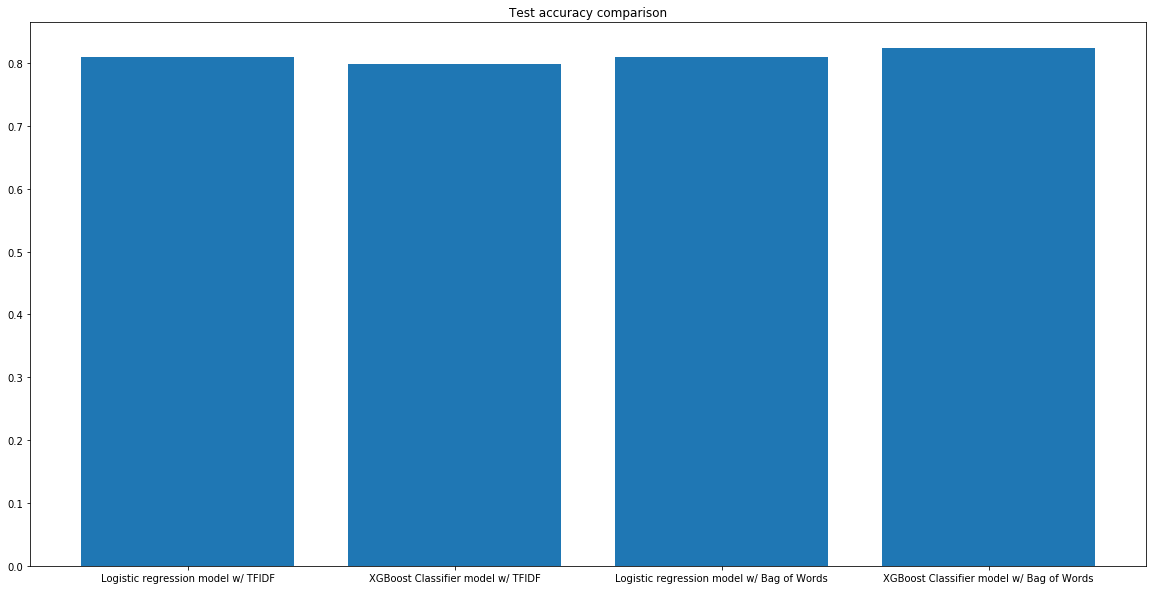

In [48]:
#Test Accuracy comparision
ltr=[w1,w2,w3,w4]
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(ltr))], ltr)
plt.xticks(np.arange(4),('Logistic regression model w/ TFIDF','XGBoost Classifier model w/ TFIDF','Logistic regression model w/ Bag of Words','XGBoost Classifier model w/ Bag of Words'))
plt.title('Test accuracy comparison')
plt.show()

**The test accuracy for the XGBoost Classifier w/ Bag of Words is the best for sentiment classification.**

# US Elections 2020 Negative Reason TF-IDF

In [49]:
#Splitting the data for onyl negative sentiments
df2=df2.drop(df2[df2.sentiment==1].index)
y_us=df2['negative_reason']
X_us=df2.drop(['text_data','negative_reason'], axis=1)

In [50]:
#Encoding categorical values for target
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
y=ord_enc.fit_transform(np.array(y_us).reshape(-1,1))
y=y.reshape(X_us.shape[0],1)
display(y)

array([[1.],
       [4.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X_us, y, test_size=0.3, stratify=y, random_state=42)

In [52]:
#f1_micro is used here since the labels are imbalanced for multiclass classification and precision and recall are both important
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

pipe3=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
params3={'pca__n_components':[30,40,50],'lr__penalty':['l1','l2','ElasticNet'],'lr__C':[0.01,0.1,1],'lr__max_iter':[2000],'lr__multi_class':['multinomial']}
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search3= GridSearchCV(pipe3, params3, scoring='f1_micro', n_jobs=-1, cv=kf)
grid_result3= grid_search3.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.327003 using {'lr__C': 0.01, 'lr__max_iter': 2000, 'lr__multi_class': 'multinomial', 'lr__penalty': 'l2', 'pca__n_components': 40}


D:\Softwares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
model3=grid_result3.best_estimator_
model3.fit(X_train, y_train)
y_pred=model3.predict(X_test)
z1=f1_score(y_test,y_pred, average='micro')
print('The test accuracy for the logistic regression model:',z1)

The test accuracy for the logistic regression model: 0.3157894736842105


D:\Softwares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
from xgboost import XGBClassifier

pipe2=Pipeline([('sc',StandardScaler()),('pca',PCA()),('xgc',XGBClassifier())])
params2={'pca__n_components':[20,30,50],'xgc__learning_rate':[0.01,0.1,1],'xgc__n_estimators':[300,400,500],'xgc__max_depth':[3,4]}
grid_search2 = GridSearchCV(pipe2, params2, scoring='f1_micro', n_jobs=-1, cv=kf)
grid_result2 = grid_search2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.317861 using {'pca__n_components': 30, 'xgc__learning_rate': 0.01, 'xgc__max_depth': 3, 'xgc__n_estimators': 400}


In [55]:
model2=grid_result2.best_estimator_
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
z2=f1_score(y_test,y_pred, average='micro')
print('The test accuracy for the XGBoost model:',z2)

D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test accuracy for the XGBoost model: 0.29736842105263156


# US Elections 2020 Negative Reason Bag of Words

In [56]:
#Splitting the data for onyl negative sentiments
df7=df7.drop(df7[df7.sentiment==1].index)
y_us=df7['negative_reason']
X_us=df7.drop(['text_data','negative_reason'], axis=1)

In [57]:
#Encoding categorical values for target
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
y=ord_enc.fit_transform(np.array(y_us).reshape(-1,1))
y=y.reshape(X_us.shape[0],1)
display(y)

array([[1.],
       [4.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X_us, y, test_size=0.3, stratify=y, random_state=42)

In [59]:
#f1_micro is used here since the labels are imbalanced for multiclass classification and precision and recall are both important
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

pipe3=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
params3={'pca__n_components':[30,40,50],'lr__penalty':['l1','l2','ElasticNet'],'lr__C':[0.01,0.1,1],'lr__max_iter':[2000],'lr__multi_class':['multinomial']}
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search3= GridSearchCV(pipe3, params3, scoring='f1_micro', n_jobs=-1, cv=kf)
grid_result3= grid_search3.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.323639 using {'lr__C': 0.01, 'lr__max_iter': 2000, 'lr__multi_class': 'multinomial', 'lr__penalty': 'l2', 'pca__n_components': 30}


D:\Softwares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
model3=grid_result3.best_estimator_
model3.fit(X_train, y_train)
y_pred=model3.predict(X_test)
z3=f1_score(y_test,y_pred, average='micro')
print('The test accuracy for the logistic regression model:',z3)

The test accuracy for the logistic regression model: 0.3105263157894737


D:\Softwares\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from xgboost import XGBClassifier

pipe2=Pipeline([('sc',StandardScaler()),('pca',PCA()),('xgc',XGBClassifier())])
params2={'pca__n_components':[20,30,50],'xgc__learning_rate':[0.01,0.1,1],'xgc__n_estimators':[300,400,500],'xgc__max_depth':[3,4]}
grid_search2 = GridSearchCV(pipe2, params2, scoring='f1_micro', n_jobs=-1, cv=kf)
grid_result2 = grid_search2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.317886 using {'pca__n_components': 30, 'xgc__learning_rate': 0.01, 'xgc__max_depth': 4, 'xgc__n_estimators': 400}


In [62]:
model2=grid_result2.best_estimator_
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
z4=f1_score(y_test,y_pred, average='micro')
print('The test accuracy for the XGBoost model:',z4)

D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test accuracy for the XGBoost model: 0.29736842105263156


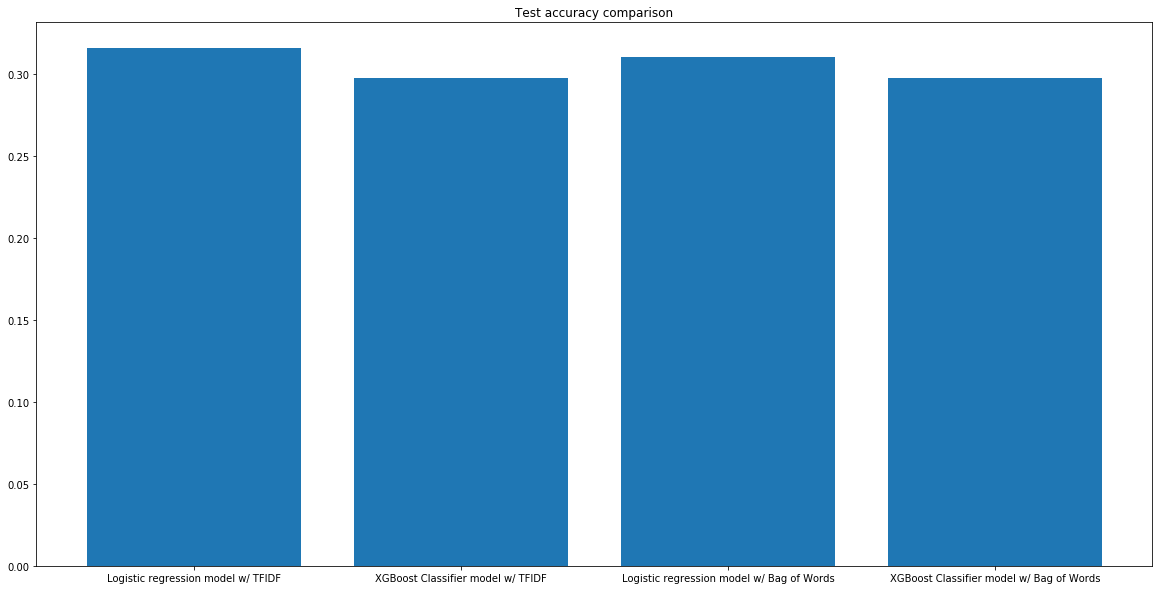

In [63]:
#Model Evalution
lts=[z1,z2,z3,z4]
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(lts))], lts)
plt.xticks(np.arange(4),('Logistic regression model w/ TFIDF','XGBoost Classifier model w/ TFIDF','Logistic regression model w/ Bag of Words','XGBoost Classifier model w/ Bag of Words'))
plt.title('Test accuracy comparison')
plt.show()

**The test accuracy for the Logistic Regression w/ TF-IDF is the best for negative reson classification for US elections 2020.**

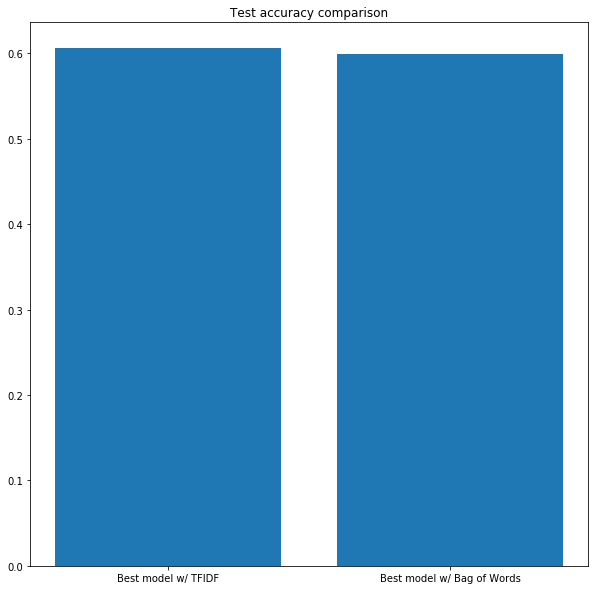

In [86]:
#Model evaluation on US Elections 2020 sentiment analysis
og=[o1,o2]
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(og))], og)
plt.xticks(np.arange(2),('Best model w/ TFIDF','Best model w/ Bag of Words'))
plt.title('Test accuracy comparison')
plt.show()

**From the above we can see that best model w/ TFIDF is better is accuracy compared to best model w/ bag of words for US elections 2020 sentiment classification.**

# Exploratory Analysis

In [64]:
#Creating a dictionary for common terms which can help identify the political party
ds={'Republican':['\bdonald ?trump\b','\btrump2020\b','\bmaga\b','\bmike ?pence\b','\bmitch ?mcconnel\b','\bmake ?america ?great ?again\b'],'Democratic':['\bjoe ?biden\b','\bbiden2020\b','\bkamala ?harris\b','\bnancy ?pelosi\b','\baoc\b','\bbuild ?back ?better\b']}
def label_parties(text, value):
    for i in value:
        pattern = re.compile(i)
        result = pattern.search(text)
        if result != None:
            return 1
        else:
            pass
    return 0

In [65]:
#Encoding ofr respective political party
for key,value in ds.items():
    tdf[key]=tdf['text'].apply(label_parties,value=value)
display(tdf)

,text,sentiment,Republican,Democratic
0,"b'@robreiner so afraid of nov, dec, and jan! e...",0,0,0
1,"b""rt @suec00k: lord sumption launches recovery...",0,0,0
2,b'rt @walidphares: uber timing: after #biden a...,0,0,0
3,b'every 107 seconds an american is dying from ...,1,0,0
4,b'rt @thewebbix: the #democrats embrace #diver...,1,0,0
...,...,...,...,...
2547,"b'rt @boycottutah: it is friday, october 30, 2...",1,0,0
2548,b'@nowthisnews delivered today in montgomery c...,1,0,0
2549,b'@donaldjtrumpjr duhnnie jr. lied on fox when...,0,0,0
2550,b'rt @pale_ranger: any ideas why @joebiden is ...,0,0,0


In [66]:
df.describe()

,sentiment
count,2552.000000
mean,0.504702
std,0.500076
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


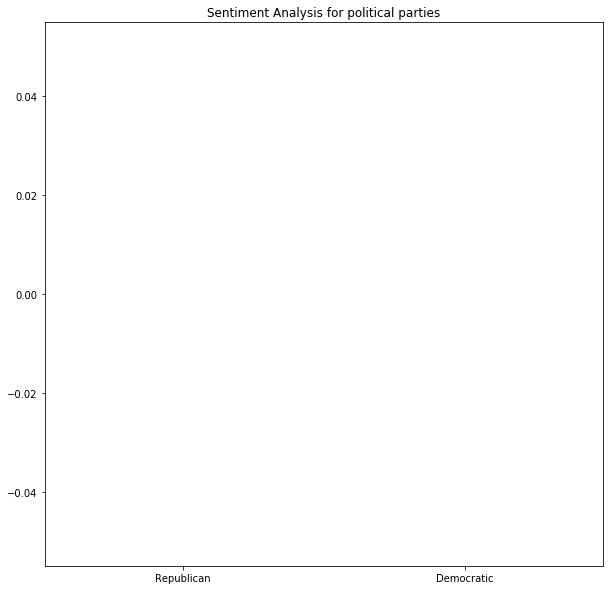

In [67]:
#Sentiment Analysis for political parties
plt.figure(figsize=(10,10))
plt.bar([0,1], [tdf.loc[tdf['Republican']==1,'Republican'].count(),tdf.loc[tdf['Democratic']==1,'Democratic'].count()])
plt.xticks(np.arange(2),('Republican','Democratic'))
plt.title('Sentiment Analysis for political parties')
plt.show()

**Separation of both the political parties is not possible since the key terms for both parties can mentioned in one tweet.Hence separation is not viable with simple methods.Hashtags were also used to separate political parties but even that method gave the same result.Hence we can conclude that the representation of both political parties is equal in tweets.
Also in part 4 we are supposed to implement the best model on either of the tweets of any one political party and see if there is any difference in accuracy.Due to the above stated reasons, the outcome will be the same**

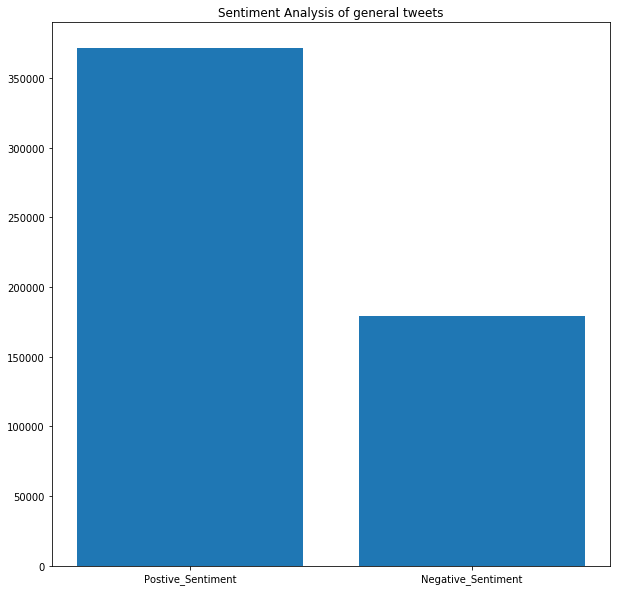

In [68]:
#Sentiment Analysis for positive and negative sentiments
plt.figure(figsize=(10,10))
plt.bar([0,1], [sdf.loc[sdf['label']==1,'label'].count(),sdf.loc[sdf['label']==0,'label'].count()])
plt.xticks(np.arange(2),('Postive_Sentiment','Negative_Sentiment'))
plt.title('Sentiment Analysis of general tweets')
plt.show()

**From the above plot we can see that postive sentiment tweets are more that negative sentiment tweets in general tweets dataset**

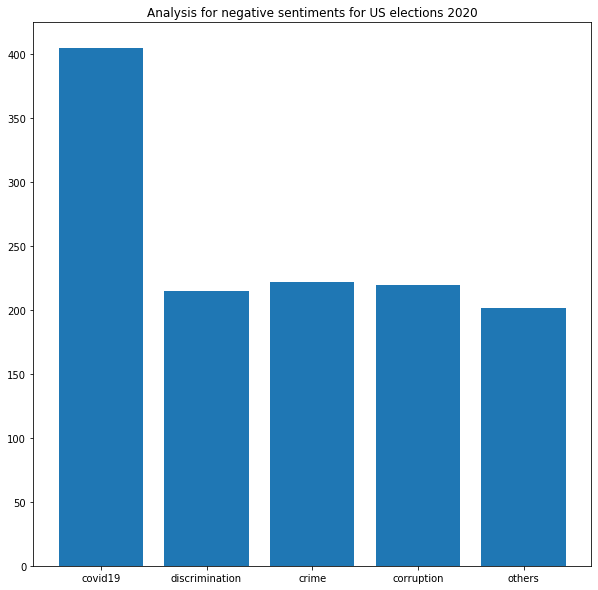

In [89]:
#Analysis for negative sentiments for US elections 2020
plt.figure(figsize=(10,10))
plt.bar([0,1,2,3,4], [df.loc[df['negative_reason']=='covid19','negative_reason'].count(),df.loc[df['negative_reason']=='discrimination','negative_reason'].count(),df.loc[df['negative_reason']=='crime','negative_reason'].count(),df.loc[df['negative_reason']=='corruption','negative_reason'].count(),df.loc[df['negative_reason']=='others','negative_reason'].count()])
plt.xticks(np.arange(5),('covid19','discrimination','crime','corruption','others'))
plt.title('Analysis for negative sentiments for US elections 2020')
plt.show()

**From the above plot we can see that the major reason for negative sentiment is covid19 from US elections 2020 tweets.**

# N-Grams

In [69]:
#Creating a vocabulary
sent=' '.join(df['text_data'].values)
vocab=sent.split(' ')
vocab=list(set(vocab))
display(vocab)

['feel',
 'veto',
 'keeps',
 'springsteen',
 'blue',
 'wcdemocrats',
 'fakemelania',
 'rudi',
 'failure',
 'democats',
 'virgina',
 'far',
 'attendance',
 'modern',
 'ntheir',
 'unreal',
 'pippacrerar',
 'votersuppression',
 'unitedstates',
 'tonight',
 'is',
 'palmerreport',
 'nobody',
 'trapped',
 'committee',
 'sharkyrae',
 'thelastbubble',
 'burden',
 'rshowksvyv',
 'round',
 'tayzlor',
 'hunterbidenpedo',
 'something',
 'fun',
 'works',
 'rand',
 'unfettered',
 'wing',
 'beyond',
 'chanukah',
 'newsnight',
 'leadright',
 'vile',
 'nmore',
 'wray',
 'shld',
 'breaker',
 'folks',
 'realize',
 'georgiaearlyvoting',
 'bit',
 'horrible',
 'times',
 'marksimoneny',
 'teampelosi',
 'nwhen',
 'ceparmaturework',
 'poetry',
 'terrorismo',
 'unfortunately',
 'increase',
 'inciting',
 'votebidenharristoendthisnightmare',
 'juju',
 'red',
 'headquarters',
 'johnpavlovitz',
 'accepted',
 'ewarren',
 'flywithkamala',
 'supreme',
 'possible',
 'scrolling',
 'pa',
 'trumpiscompromised',
 'instagra

In [70]:
#Feature engineering for unigrams
ng=CountVectorizer(ngram_range=(1,1),vocabulary=vocab)
sdf_vectors=ng.fit_transform(sem_df['text_data'].values)
vectors_list=sdf_vectors.todense().tolist()
features=ng.get_feature_names()
sdf_ng= pd.DataFrame(vectors_list, columns=features)
display(sdf_ng)

,feel,veto,keeps,springsteen,blue,wcdemocrats,fakemelania,rudi,failure,democats,...,advisories,colleagues,voteearly,seem,ad,need,chance,sabqxnryxe,remasculate,denier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df8=sem_df.join(sdf_ng, on=sem_df.index, how='left')
display(df8)

,ID,text_data,label_value,feel,veto,keeps,springsteen,blue,wcdemocrats,fakemelania,...,advisories,colleagues,voteearly,seem,ad,need,chance,sabqxnryxe,remasculate,denier
0,7.831250e+17,nationalboyfriendday thanks for bomb dick http...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.956420e+17,handmade with an italian influence our chocola...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.977930e+17,most iditarod dogs are forced to live at the e...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.001800e+17,last summer in germany was so great can i go b...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.685050e+17,rt gurmeetramrahim a stunning move well done p...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,8.032700e+17,seeing all the love i got a year ago thank you...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5499,8.025520e+17,check out ansley another team gb gold medalist...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500,7.686060e+17,rt ofcparodyacc happy weeksary sa ating lahat ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5501,7.685390e+17,rt harry styles is so cute kcacolombia kcaarge...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y=df8['label_value']
X=df8.drop(['label_value','text_data','ID'], axis=1)

In [73]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [74]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


pipe=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
params={'pca__n_components':[30,40,50],'lr__penalty':['l1','l2','ElasticNet'],'lr__C':[0.1,0.5,1],'lr__max_iter':[2000]}
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipe, params, scoring='f1', n_jobs=-1, cv=kf)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.843158 using {'lr__C': 1, 'lr__max_iter': 2000, 'lr__penalty': 'l2', 'pca__n_components': 50}


In [75]:
model1=grid_result.best_estimator_
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
w6=f1_score(y_test,y_pred)
print('The test accuracy for the logistic regression model:',w6)

The test accuracy for the logistic regression model: 0.8420175072947061


In [76]:
from xgboost import XGBClassifier

pipe2=Pipeline([('sc',StandardScaler()),('pca',PCA()),('xgc',XGBClassifier())])
params2={'pca__n_components':[20,30,50],'xgc__learning_rate':[0.01,0.1,1],'xgc__n_estimators':[300,400,500],'xgc__max_depth':[3,4]}
grid_search2 = GridSearchCV(pipe2, params2, scoring='f1', n_jobs=-1, cv=kf)
grid_result2 = grid_search2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.853152 using {'pca__n_components': 50, 'xgc__learning_rate': 0.1, 'xgc__max_depth': 4, 'xgc__n_estimators': 300}


In [77]:
model2=grid_result2.best_estimator_
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)
w7=f1_score(y_test,y_pred)
print('The test accuracy for the XGBoost model:',w7)

The test accuracy for the XGBoost model: 0.8508578970523537


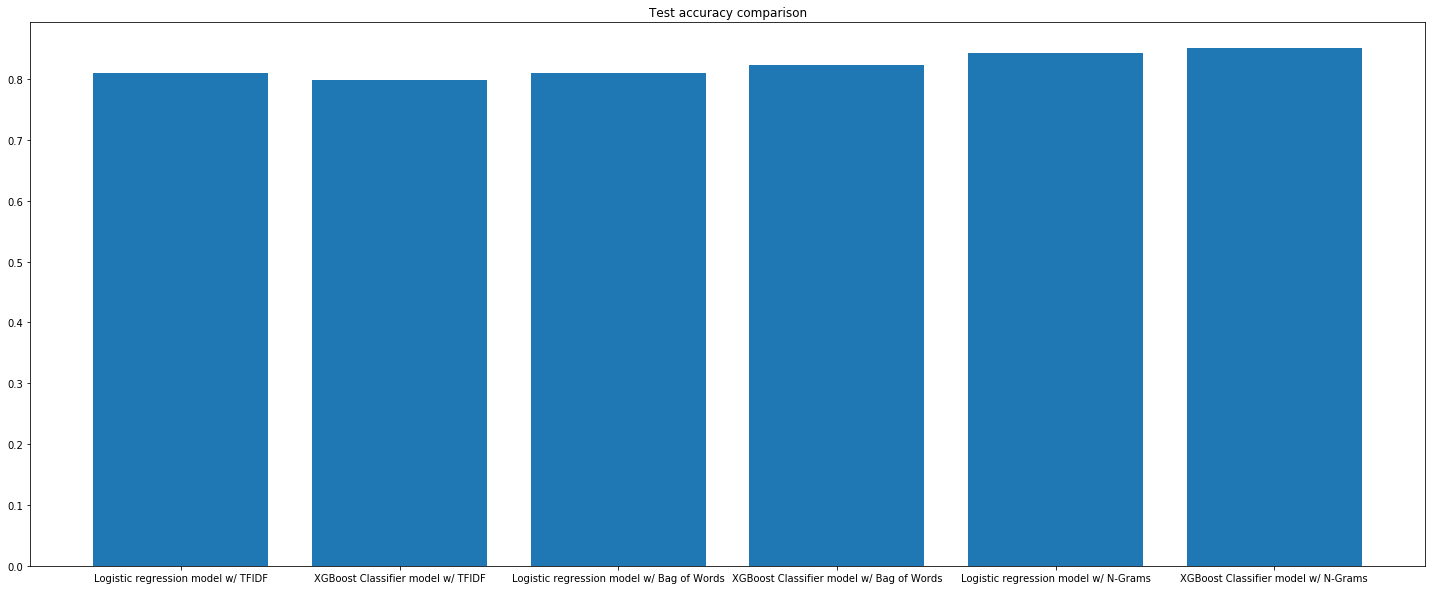

In [87]:
#Model Evaluation
lz=[w1,w2,w3,w4,w6,w7]
plt.figure(figsize=(25,10))
plt.bar([x for x in range(len(lz))], lz)
plt.xticks(np.arange(6),('Logistic regression model w/ TFIDF','XGBoost Classifier model w/ TFIDF','Logistic regression model w/ Bag of Words','XGBoost Classifier model w/ Bag of Words','Logistic regression model w/ N-Grams','XGBoost Classifier model w/ N-Grams'))
plt.title('Test accuracy comparison')
plt.show()

**You can see from the above plot that using n-grams with XGBoost gives the best test accuracy.**

In [79]:
df_vectors=ng.transform(df['text_data'].values)
vectors_list=df_vectors.todense().tolist()
features=ng.get_feature_names()
df_ng= pd.DataFrame(vectors_list, columns=features)
display(df_ng)

,feel,veto,keeps,springsteen,blue,wcdemocrats,fakemelania,rudi,failure,democats,...,advisories,colleagues,voteearly,seem,ad,need,chance,sabqxnryxe,remasculate,denier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df9=df.join(df_ng, on=df.index, how='left')
display(df9)

,text_data,sentiment,negative_reason,feel,veto,keeps,springsteen,blue,wcdemocrats,fakemelania,...,advisories,colleagues,voteearly,seem,ad,need,chance,sabqxnryxe,remasculate,denier
0,b robreiner so afraid of nov dec and jan even ...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b rt lord sumption launches recovery a new ini...,0,others,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b rt walidphares uber timing after biden advis...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b every seconds an american is dying from the ...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b rt thewebbix the democrats embrace diversity...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,b rt boycottutah it is friday october one citi...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2548,b nowthisnews delivered today in montgomery co...,1,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2549,b donaldjtrumpjr duhnnie jr lied on fox when h...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,b rt any ideas why joebiden is wasting time in...,0,covid19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
y_us=df9['sentiment']
X_us=df9.drop(['sentiment','text_data','negative_reason'], axis=1)

In [82]:
y_pred_us=model2.predict(X_us)
o3=f1_score(y_us,y_pred_us)
print('The test accuracy for the XGBoost model:',o3)

The test accuracy for the XGBoost model: 0.6062033765213978


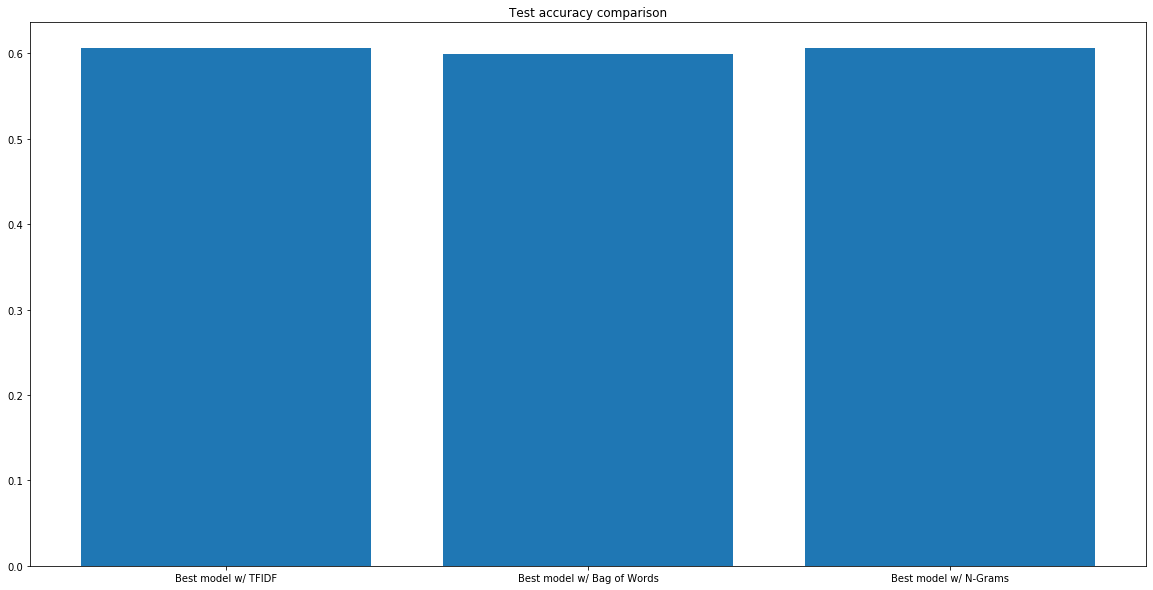

In [88]:
ol=[o1,o2,o3]
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(ol))], ol)
plt.xticks(np.arange(3),('Best model w/ TFIDF','Best model w/ Bag of Words','Best model w/ N-Grams'))
plt.title('Test accuracy comparison')
plt.show()